In [1]:
import pandas as pd
import statsmodels.api as sm

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
t = go.layout.Template(
    layout=go.Layout(
        hovermode='x'
    )
)
t.data.scatter = [
    go.Scatter(hoverlabel=go.scatter.Hoverlabel(namelength=-1))
]
t.data.bar = [
    go.Bar(hoverlabel=go.bar.Hoverlabel(namelength=-1))
]
pio.templates["my"] = t
pio.templates.default = "plotly_dark+my"

# House Prices Inflation

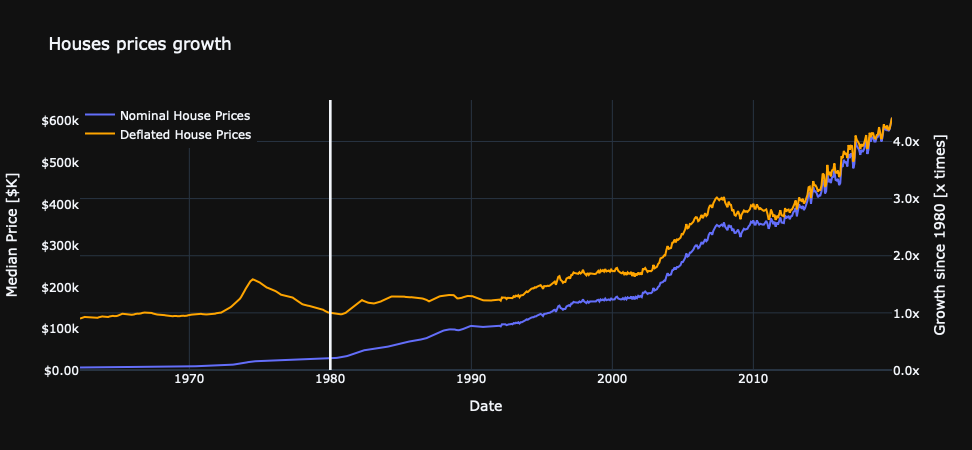

In [5]:
houses = pd.read_csv('out/gen/house-prices_1962-now.csv', parse_dates=True, index_col=[0, 1])

df = houses.loc["Total"]
k = df.loc["1980-01-01", 'Deflated House Prices']
df['Deflated House Prices X'] = df['Deflated House Prices']/k
fig = go.Figure(
 data = [
     go.Scatter(x=df.index, y=df['Nominal House Prices'], 
                name="Nominal House Prices"),
     go.Scatter(x=df.index, y=df['Deflated House Prices'], 
                name="Deflated House Prices",  line=go.scatter.Line(color='Orange')),
     go.Scatter(x=df.index, y=df['Deflated House Prices X'], yaxis="y2", opacity=0, 
                name="Growth since 1980", showlegend=False, line=go.scatter.Line(color='Orange'))
 ],
 layout=go.Layout(
    title='Houses prices growth',
    
    yaxis=go.layout.YAxis(title="Median Price [$K]", tickformat="$.3s", range=[0,650000], showgrid=False),
    yaxis2=go.layout.YAxis(
        title='Growth since 1980 [x times]', overlaying='y', side='right',
        range=[0,650000/k], tickformat=".1f", ticksuffix='x'
    ),
    xaxis=go.layout.XAxis(title = "Date"),
    shapes = [dict(x0="1980-01-01", y0=0, y1=650000, x1="1980-01-01")],
    legend = go.layout.Legend(x=0)
))
fig.show()


Sources: REINZ, Stats NZ

Until around 1982 the houses were appreciated along with other products. 

However, sinse than houses appreciated 5x times more than other products.

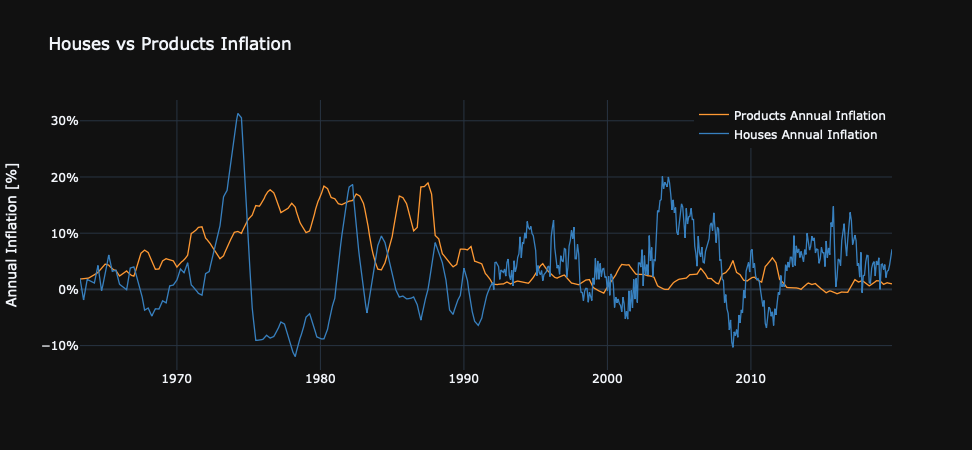

In [7]:
df = houses.loc['Total'].pct_change(12).dropna()[['Deflator', 'Deflated House Prices']]
df.columns = ['Products Annual Inflation', 'Houses Annual Inflation']
df.iplot(
    layout=go.Layout(
        title = "Houses vs Products Inflation",
        yaxis=go.layout.YAxis(title='Annual Inflation [%]', tickformat='%'),
        legend = go.layout.Legend(xanchor="right", x=1)
    )
)

Sources: REINZ, Stats NZ

Except two periods following lange finance crysises, the housing annual inflation level was higher than consumable's inflation. Up to 20% in 2004 vs 2.5% at the same period.

# Rent

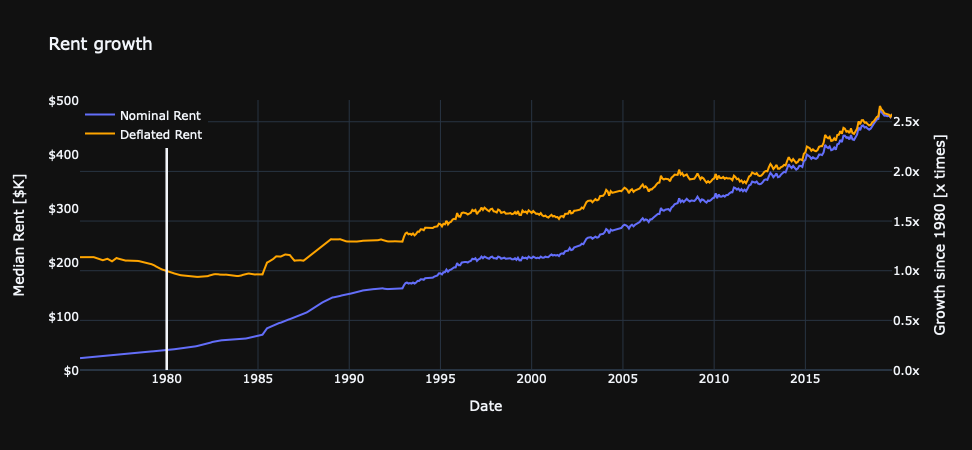

In [9]:
rent = pd.read_csv('out/gen/rent_1975-now.csv', parse_dates=True, index_col=[0,1])

df = rent.loc['Total'][['Nominal Rent', 'Deflated Rent']]

k = df.loc["1980-01-01", 'Deflated Rent']
df['Deflated Rent X'] = df['Deflated Rent']/k
fig = go.Figure(
 data = [
     go.Scatter(x=df.index, y=df['Nominal Rent'], 
                name="Nominal Rent"),
     go.Scatter(x=df.index, y=df['Deflated Rent'], 
                name="Deflated Rent",  line=go.scatter.Line(color='Orange')),
     go.Scatter(x=df.index, y=df['Deflated Rent X'], yaxis="y2", opacity=0, 
                name="Growth since 1980", line=go.scatter.Line(color='Orange'), showlegend=False)
 ],
 layout=go.Layout(
    title='Rent growth',
    yaxis=go.layout.YAxis(title="Median Rent [$K]", tickformat="$.0f", range=[0,500], showgrid=False),
    yaxis2=go.layout.YAxis(
        title='Growth since 1980 [x times]', overlaying='y', side='right',
        range=[0,500/k], tickformat=".1f", ticksuffix='x'
    ),
    xaxis=go.layout.XAxis(title = "Date"),
    shapes=[dict(x0="1980-01-01", y0=0, y1=500, x1="1980-01-01")],
    legend = go.layout.Legend(x=0)
))
fig.show()

Sources: MBIE NZ, Stats NZ

Rent growth twice higher than other products since 1975.

Possibly, it's due to income growth which will correlate with GDP per capita growth.

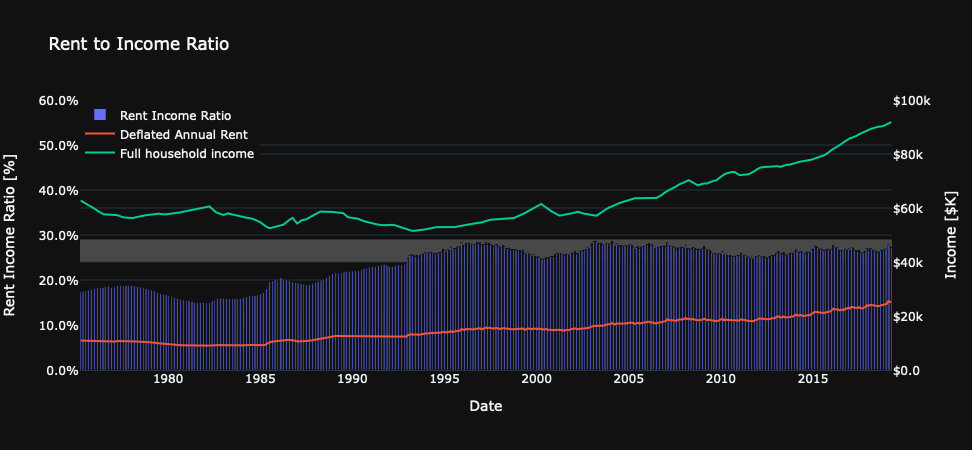

In [10]:
income = pd.read_csv('out/gen/income_stats-nz_1972-now.csv', parse_dates=True, index_col=0)

df = income.dropna()

fig = go.Figure(
 data = [
     go.Bar(x=df.index, y=df["Rent Income Ratio"], 
                name="Rent Income Ratio"),

     go.Scatter(x=df.index, y=df["Deflated Rent"], 
                name="Deflated Annual Rent", yaxis="y2"),
     go.Scatter(x=df.index, y=df["Deflated Household Income"], 
                name="Full household income", yaxis="y2")
          
 ],
 layout=go.Layout(
    title='Rent to Income Ratio',
    xaxis=go.layout.XAxis(title = "Date"),
    yaxis2=go.layout.YAxis(title="Income [$K]", overlaying='y', side='right', tickformat="$.2s", range=[0,100000]),
    yaxis=go.layout.YAxis(title="Rent Income Ratio [%]", tickformat=".1%", range=[0,0.6]),
    legend = go.layout.Legend(x=0, y=1),
    shapes = [
         go.layout.Shape(type="rect",x0=0, y0=0.24, x1=1, y1=0.29,
            line_width=0, layer='below', fillcolor="rgba(128, 128, 128, 0.5)",
                         xref="paper"
        )
     ],
))
fig.show()

Sources: MBIE, Stats NZ

Rent to income ratio was quite stable 25-29% from 1993 from 24.6% in 2000 to 28.8% in 2004. At the beginning of 80th it was around 16-17%.

Rent to income ratio does not show any correlation with house prices. 

Hypotises: Rent could've achieved the high resistance threshold for rent to income ratio at about 27-28%.  

Hypotises: The higher price, the more people with higher income have to rent pushing the rent higher. It makes it more interesting to invest in houses. This is pushing the prices even higher.

# Dwellings

Optimization terminated successfully.
         Current function value: -5.330996
         Iterations: 45
         Function evaluations: 88


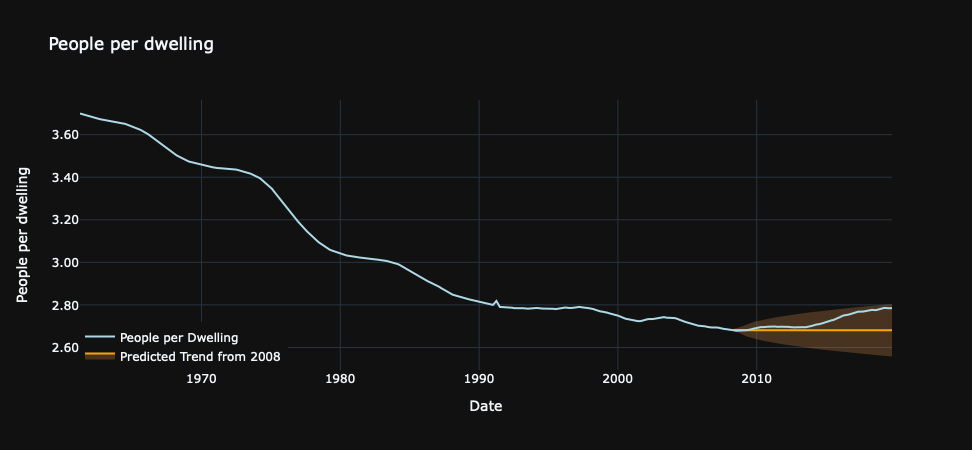

In [11]:
dwellings = pd.read_csv('out/gen/dwellings_stats-nz_1961-now.csv', parse_dates=True, index_col=0)
dwellings.index = pd.DatetimeIndex(dwellings.index.values, freq='MS')

df = dwellings.loc["1980-04-01":"2008-04-01", "People per Dwelling"]

model = sm.tsa.SARIMAX(df, order=(1, 1, 1))#, trend='c')
model_fit = model.fit(method='nm')

df = pd.merge_asof(dwellings, model_fit.get_forecast(dwellings.index.max()).summary_frame(), left_index=True, right_index=True)


fig = go.Figure(
 data = [
     go.Scatter(x=df.index, y=df['mean_ci_upper'], 
                showlegend=False, name="Minimum predicted", 
                line=go.scatter.Line(color='Orange', width=0)),
     go.Scatter(x=df.index, y=df['mean'], 
                name="Predicted Trend from 2008", line=go.scatter.Line(color='Orange'),
                fillcolor='rgba(200, 128, 68, 0.3)', fill='tonexty'
               ),
     go.Scatter(x=df.index, y=df['mean_ci_lower'], 
                showlegend=False, name="Minimum predicted", 
                fillcolor='rgba(200, 128, 68, 0.3)', fill='tonexty', 
                line=go.scatter.Line(color='Orange', width=0)),
     go.Scatter(x=df.index, y=df["People per Dwelling"], 
                name="People per Dwelling", line=go.scatter.Line(color='LightBlue'))
 ],
 layout=go.Layout(
    title='People per dwelling',
    yaxis=go.layout.YAxis(title="People per dwelling", tickformat=".2f"),
    xaxis=go.layout.XAxis(title = "Date"),
    legend = go.layout.Legend(x=0, y=0)
))
fig.show()


Sources: Stats NZ

People per dwelling was continiously going down until 2008 (finance crysis) achieving the minimum 2.68 people per dwelling and then went up 2.78. 

If we continue the trend, the mean value would've achieved 2.66 people per dwelling. 2.78 is a higher number however it's inside the confidance interval of the model. So it does not allow to say that there is a housing shortage based on the data.

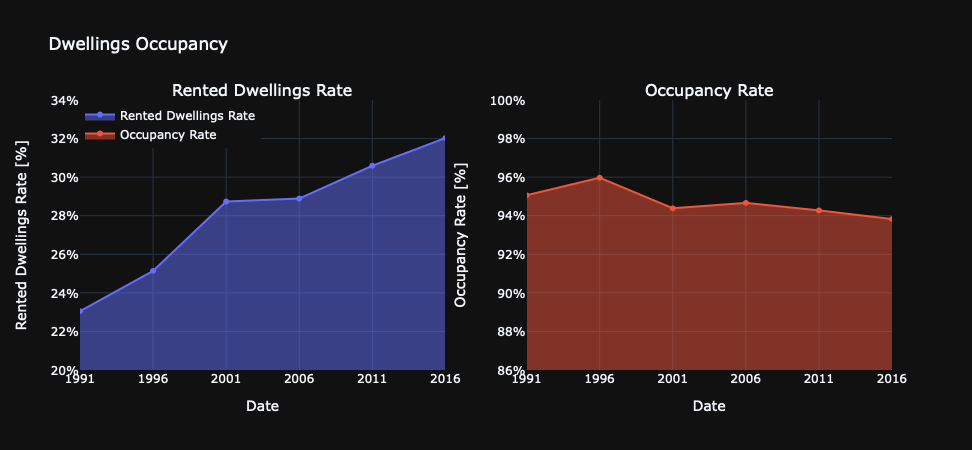

In [12]:
df = dwellings.loc['1991-04-01': '2016-04-01', ['Rented Dwellings Rate', 'Occupancy Rate']]
df.index = df.index - pd.DateOffset(months=-3)
df = df.resample('5AS').first()

ticks = ['1991', '1996', '2001', '2006', '2011', '2016']
#df.iplot(subplots=True, layout=go.Layout(
#    title='Dwellings Occupancy', 
#    height = 10,
#    yaxis=go.layout.YAxis(title="Rate", tickformat="%.0f"),
#    xaxis=go.layout.XAxis(title = "Date", tickvals=ticks, ticktext=ticks),
#    legend = go.layout.Legend(x=0, y=1)
#))

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Rented Dwellings Rate", "Occupancy Rate"))

fig.add_trace(go.Scatter(x=df.index, y=df['Rented Dwellings Rate'], 
                name="Rented Dwellings Rate", fill='tozeroy'), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['Occupancy Rate'], 
                name="Occupancy Rate", fill='tozeroy'), row=1, col=2)
fig.update_xaxes(title = "Date", tickvals=ticks, ticktext=ticks, col=1, row=1)
fig.update_xaxes(title = "Date", tickvals=ticks, ticktext=ticks, col=2, row=1)
fig.update_yaxes(title="Rented Dwellings Rate [%]", tickformat="%.1f", col=1, row=1, range=[0.20, 0.34])
fig.update_yaxes(title="Occupancy Rate [%]", tickformat="%.1f", col=2, row=1, range=[0.86, 1])
fig.update_layout(
    title='Dwellings Occupancy', 
    #xaxis=go.layout.XAxis()
    legend = go.layout.Legend(x=0, y=1)
)
fig.show()

Source: Stats NZ Centuses

There is no data before 1991 and between centuces. 

Rented dwelling rate has grown significantly from 23% in 1991 to 32% in 2016. It supports the assumption that people can be forced to rent by the higher prices. 

Occupancy rate fallen insignificantly and unlikely have an high influence on the market.

# Mortgages

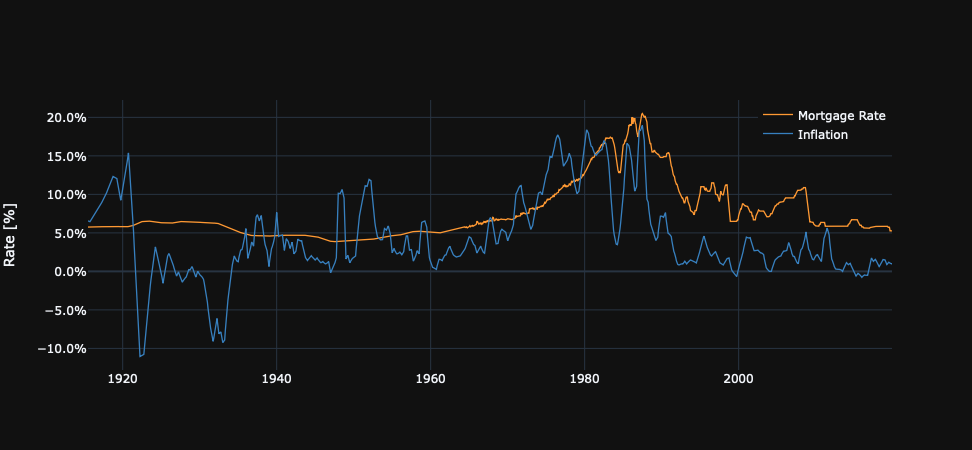

In [13]:
mortgage = pd.read_csv('out/gen/mortgage_1913-now.csv', parse_dates=True, index_col=0)

mortgage[['Mortgage Rate', 'Inflation']].dropna().iplot(layout=go.Layout(
    yaxis=go.layout.YAxis(title="Rate [%]", tickformat=".1%"),
    legend = go.layout.Legend(x=1, y=1, xanchor="right")
))

Sources: Stats NZ, RBNZ

Morgage rate was very high at 80th as well as inflation but historically the current rate is not very high.

At some periods the morgage rate was lower than inflation which makes me suspicios about the data quality because it does not make sense for banks. But probably, the were too slow to react. 

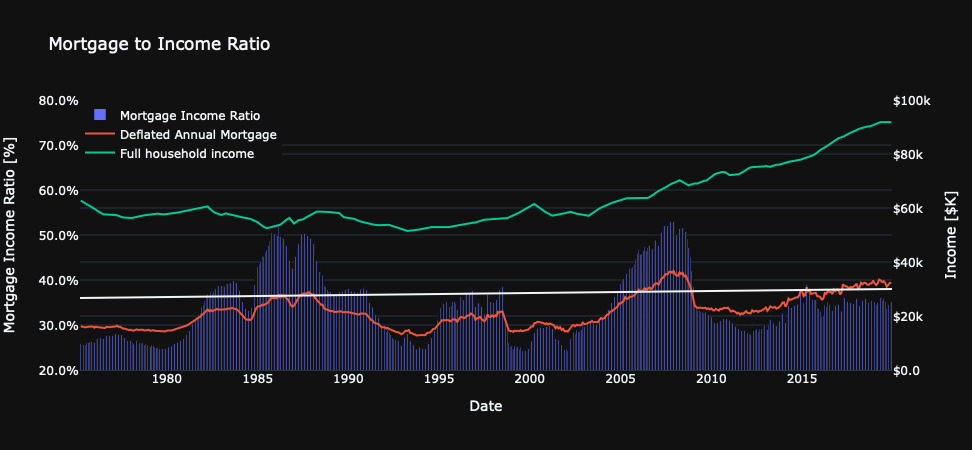

In [14]:
df = mortgage.dropna()

fig = go.Figure(
 data = [
     go.Bar(x=df.index, y=df["Mortgage Income Ratio"], 
                name="Mortgage Income Ratio"),

     go.Scatter(x=df.index, y=df["Deflated Mortgage"], 
                name="Deflated Annual Mortgage", yaxis="y2"),
     go.Scatter(x=df.index, y=df["Deflated Household Income"], 
                name="Full household income", yaxis="y2")
          
 ],
 layout=go.Layout(
    title='Mortgage to Income Ratio',
    xaxis=go.layout.XAxis(title = "Date"),
    yaxis2=go.layout.YAxis(title="Income [$K]", overlaying='y', side='right', tickformat="$.2s", range=[0,100000]),
    yaxis=go.layout.YAxis(title="Mortgage Income Ratio [%]", tickformat=".1%", range=[0.2,0.8]),
    legend = go.layout.Legend(x=0, y=1),
    shapes = [
         go.layout.Shape(type="line",x0=0, y0=0.36, x1=1, y1=0.38,xref="paper")
     ],
))
fig.show()

Sources: Stats NZ, RBNZ

Morgage is a float table morgage for 30 years with 20% deposit.

Historically, the current morgage to income ratio is not very high, it's avarage. It was very high in 80th and from 2005-2008. 

It suggests that houses are more affordable now than then from this perspective. 

However we need also consider how easy it will be to get the first deposit.

# Rates

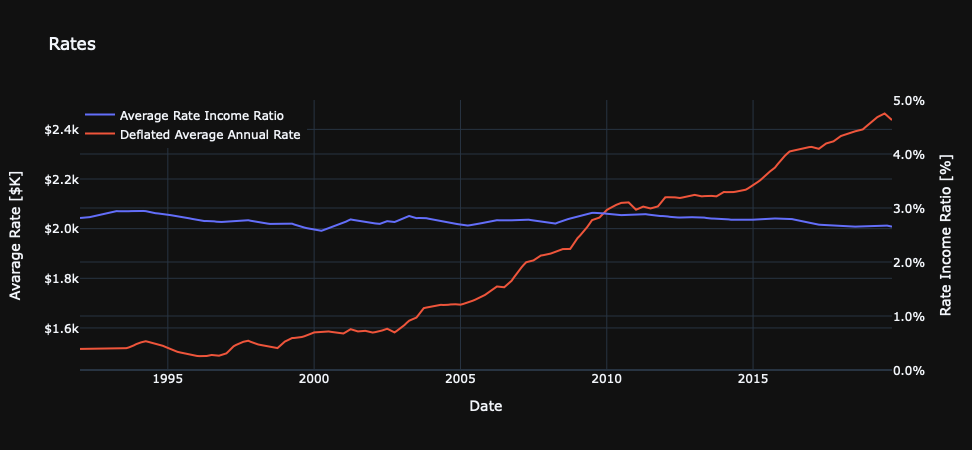

In [15]:
rates = pd.read_csv('out/gen/rates_1992-now.csv', parse_dates=True, index_col=0)
df = rates.loc['1992':]

fig = go.Figure(
 data = [
     go.Scatter(x=df.index, y=df["Average Rate Income Ratio"], 
                name="Average Rate Income Ratio", yaxis="y2"),

     go.Scatter(x=df.index, y=df["Deflated Average Rate"], 
                name="Deflated Average Annual Rate")          
 ],
 layout=go.Layout(
    title='Rates',
    xaxis=go.layout.XAxis(title = "Date"),
    yaxis=go.layout.YAxis(title="Avarage Rate [$K]", tickformat="$.2s"),
    yaxis2=go.layout.YAxis(title="Rate Income Ratio [%]", side='right', overlaying='y', tickformat=".1%", range=[0,0.05]),
    legend = go.layout.Legend(x=0, y=1),
))
fig.show()

Source: Stats NZ

Rates have a very stable per income ratio. Just from 2.7% to 2.8%. 

# Viable Deposit Rate

The viable deposit rate can be calculated based on the value when it becomes cheaper to buy the house than to rent from the house owner point of view considering money on the deposit adjusted to inflation.

$$\begin{align*} \\
rent - deposit*deposit_int >= (cost - deposit)*mortgage_int + expenses - gain
\\end{align*}


deposit_int = (crude_deposit_interest - inflation)*(1-tax)

From the investor point of view, we consider that we can buy the property when it starts to generate a higher net income than a deposit considering the inflation. 


In [74]:
%% latex 
\begin{align*}
rent - deposit*deposit_int >= (cost - deposit)*mortgage_int + expenses - gain

deposit_int = (crude_deposit_interest - inflation)*(1-tax)
\end{align*}

UsageError: Cell magic `%%` not found.


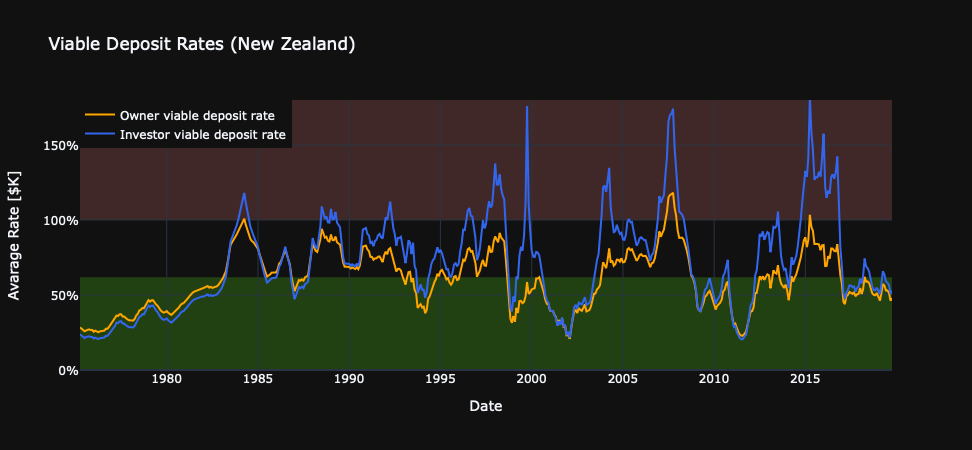

In [69]:
model = pd.read_csv('out/gen/model_1975-now.csv', parse_dates=True, index_col=[0, 1])

model['owner_deposit_rate'] = (model.expenses_rate + model.mortgage_interest - model.rent_interest - model.gain_rate)/ (model.mortgage_interest - model.deposit_interest_adj)
model['investor_deposit_rate'] = ((model.investor_expenses_rate + model.mortgage_interest - model.rent_interest)*(1 - model.tax) - model.gain_rate)/ (model.mortgage_interest*(1 - model.tax) - model.deposit_interest_adj)

def model_graph(model, title, range):
    model90 = model.loc['1990':]

    fig = go.Figure(
     data = [
         go.Scatter(x=model.index, y=model["owner_deposit_rate"], 
                    name="Owner viable deposit rate", line=go.scatter.Line(color='Orange')),

         go.Scatter(x=model.index, y=model["investor_deposit_rate"], 
                    name="Investor viable deposit rate", line=go.scatter.Line(color='#36e'))          
     ],
     layout=go.Layout(
        title=title, 
        xaxis=go.layout.XAxis(title = "Date"),
        yaxis=go.layout.YAxis(title="Avarage Rate [$K]", tickformat="%", range=range),
        legend = go.layout.Legend(x=0, y=1),
        shapes = [
            go.layout.Shape(type="rect",x0=0, y0=1.00, x1=1, y1=3,xref="paper", 
                            layer='below', fillcolor="rgba(255, 128, 128, 0.2)", line_width=0),
    #        go.layout.Shape(type="rect",x0=0, y0=model90.investor_deposit_rate.mean() - model90.investor_deposit_rate.std(), x1=1, y1=min(1, model90.investor_deposit_rate.mean() + model90.investor_deposit_rate.std()),xref="paper", 
    #                        layer='below', fillcolor="rgba(24, 98, 255, 0.3)", line_width=0),
            go.layout.Shape(type="rect",x0=0, y0=0, x1=1, y1=model90.owner_deposit_rate.mean(),xref="paper", 
                            layer='below', fillcolor="rgba(98, 255, 24, 0.2)", line_width=0),
        ]
    ))
    fig.show()

model_graph(model.loc['Total'], title='Viable Deposit Rates (New Zealand)', range=[0, 1.85])

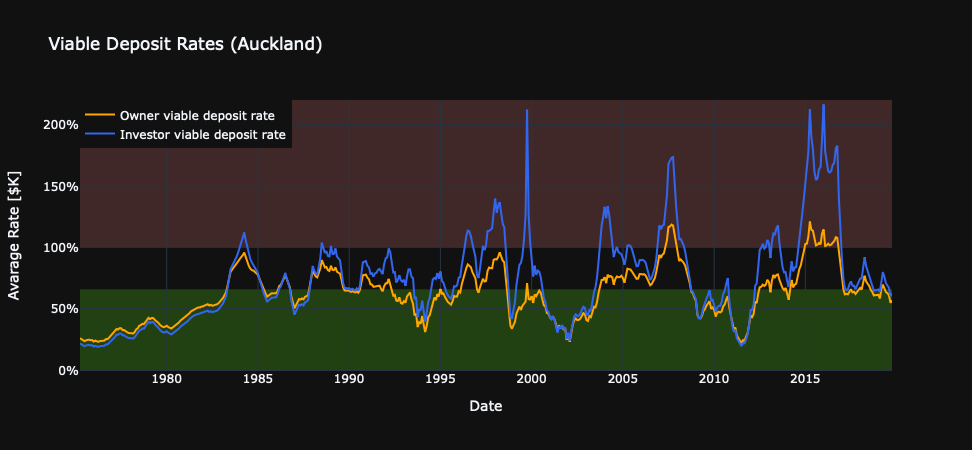

In [73]:
model_graph(model.loc['Auckland'], title='Viable Deposit Rates (Auckland)', range=[0, 2.2])

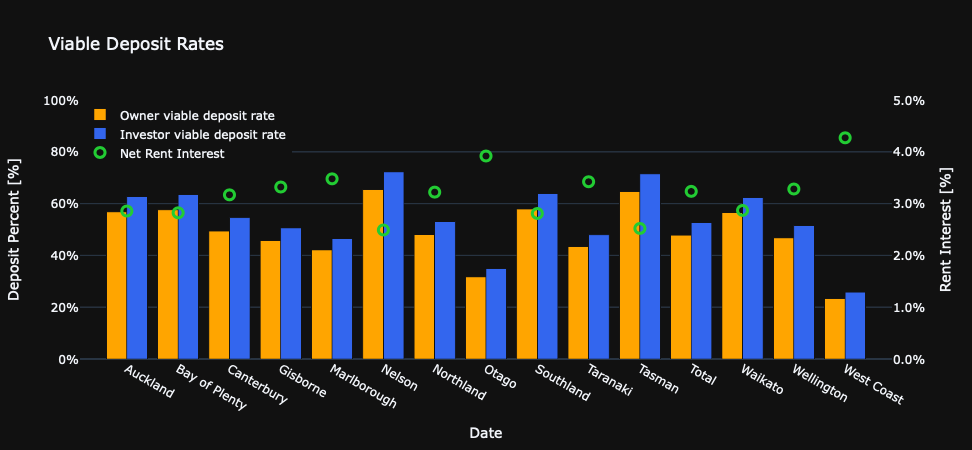

In [60]:
model_now = model.groupby(level=0).last()
#model_now[['owner_deposit_rate', 'investor_deposit_rate']].iplot(kind='bar')
#model_now[['rent_interest']].iplot(kind='bar')
#(model.expenses_rate + model.mortgage_interest - model.rent_interest - model.gain_rate)/ (model.mortgage_interest - model.deposit_interest_adj)
fig = go.Figure(
 data = [
     go.Bar(x=model_now.index, y=model_now["owner_deposit_rate"], 
            name="Owner viable deposit rate", marker=go.bar.Marker(color='Orange')),

     go.Bar(x=model_now.index, y=model_now["investor_deposit_rate"], 
                name="Investor viable deposit rate", marker=go.bar.Marker(color='#36e')),
     go.Scatter(x=model_now.index, y=model_now.rent_interest - model_now.expenses_rate,
                name="Net Rent Interest", 
                marker=go.scatter.Marker(symbol='circle-open', size=10, color='#2c3',
                                         line=go.scatter.marker.Line(width=3)), yaxis='y2', 
                line=go.scatter.Line(width=0))
 ],
 layout=go.Layout(
    title='Viable Deposit Rates',
    xaxis=go.layout.XAxis(title = "Date"),
    yaxis=go.layout.YAxis(title="Deposit Percent [%]", tickformat="%", range=[0, 1]),
    yaxis2=go.layout.YAxis(title="Rent Interest [%]", side='right', overlaying='y', tickformat=".1%", range=[0, 0.05]),
    legend = go.layout.Legend(x=0, y=1)
))
fig.show()